In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
 
data =pd.read_csv('/content/insurance.csv')

In [2]:
# # white 
# import matplotlib.pyplot as plt
 
# plt.rcParams.update({
#     "lines.color": "black",
#     "patch.edgecolor": "black",
#     "text.color": "black",
#     "axes.facecolor": "white",
#     "axes.edgecolor": "lightgray",
#     "axes.labelcolor": "black",
#     "xtick.color": "black",
#     "ytick.color": "black",
#     "grid.color": "blue",
#     "figure.facecolor": "white",
#     "figure.edgecolor": "black",
#     "savefig.facecolor": "white",
#     "savefig.edgecolor": "black"})

# plt.figure(figsize=(10,5))

In [3]:
#black
import matplotlib.pyplot as plt
 
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "blue",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

# Data Analysis:

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Observations:**
1.   no null values
2.   three obkect columns -> [sex, smoker, region]



In [6]:
object_columns=list(data.select_dtypes(['object']))
object_columns.append('children')

In [7]:
for col in object_columns:
  print(data[col].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


## Data Visualization:

### CountPlot for object_columns:

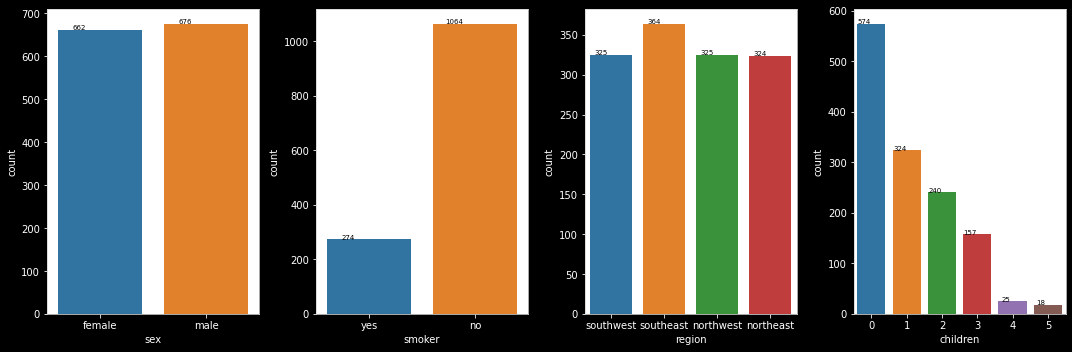

In [8]:
fig, ax =plt.subplots(ncols=4, nrows=1,figsize=(15,5))

ax=ax.flatten()
i=0
for col in object_columns:
  a=sns.countplot(data=data, x=col,ax=ax[i])
  i =i+1
  for p in a.patches:
    a.annotate( f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()),ha='center',color='black', size=7)
   
 
plt.tight_layout() 

### Barplot for object_columns:

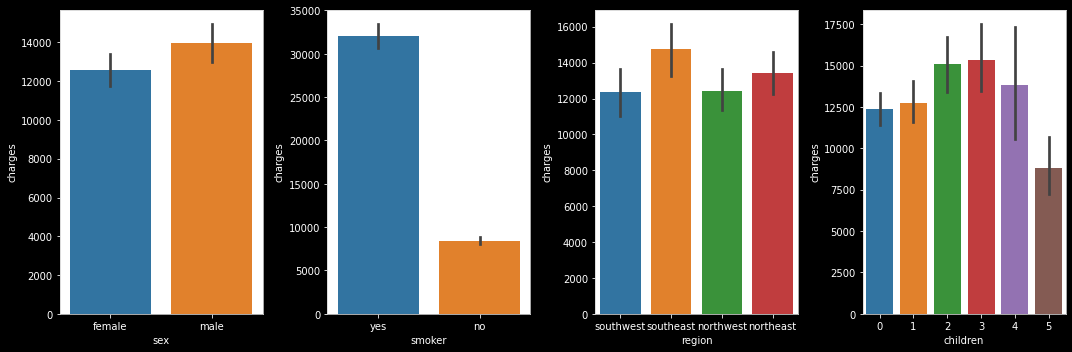

In [9]:
fig, ax =plt.subplots(ncols=4, nrows=1,figsize=(15,5))

ax=ax.flatten()
i=0
for col in object_columns:
  a=sns.barplot(data=data, x=col, y='charges', ax=ax[i])
  i =i+1
 
plt.tight_layout() 

**Observations**


1.   smoker column have a high negative correlation with charges




### Scater plot for all_columns:

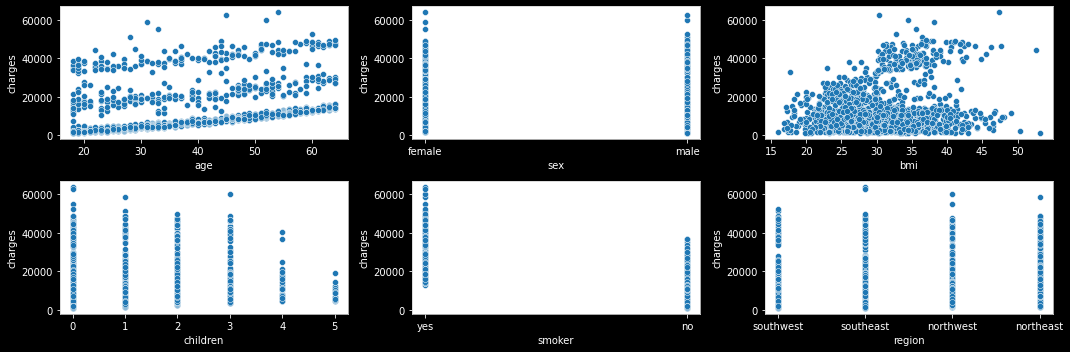

In [10]:
fig, ax =plt.subplots(ncols=3, nrows=2,figsize=(15,5))

ax=ax.flatten()
i=0
for col in data.drop(['charges'],axis=1).columns:
  a=sns.scatterplot(data=data, x=col, y='charges', ax=ax[i])
  i =i+1
 
plt.tight_layout() 

**Observations:**


1.   age has a positive correlation with charges




### Box plot for all_columns:

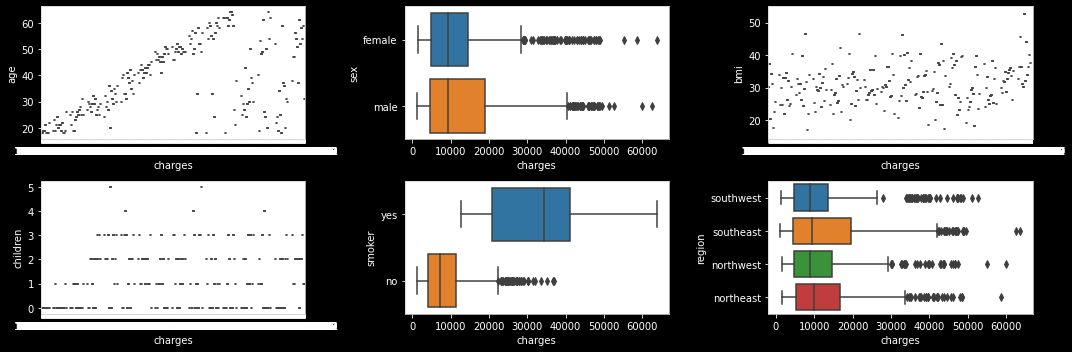

In [11]:
fig, ax =plt.subplots(ncols=3, nrows=2,figsize=(15,5))

ax=ax.flatten()
i=0
for col in data.drop(['charges'],axis=1).columns:
  a=sns.boxplot(data=data, y=col, x='charges', ax=ax[i])
  i =i+1
 
plt.tight_layout() 

**Observations:**


1.   to remove outliers -> [sex, regiom]
 



### PairGrid plot for nuemrical data:

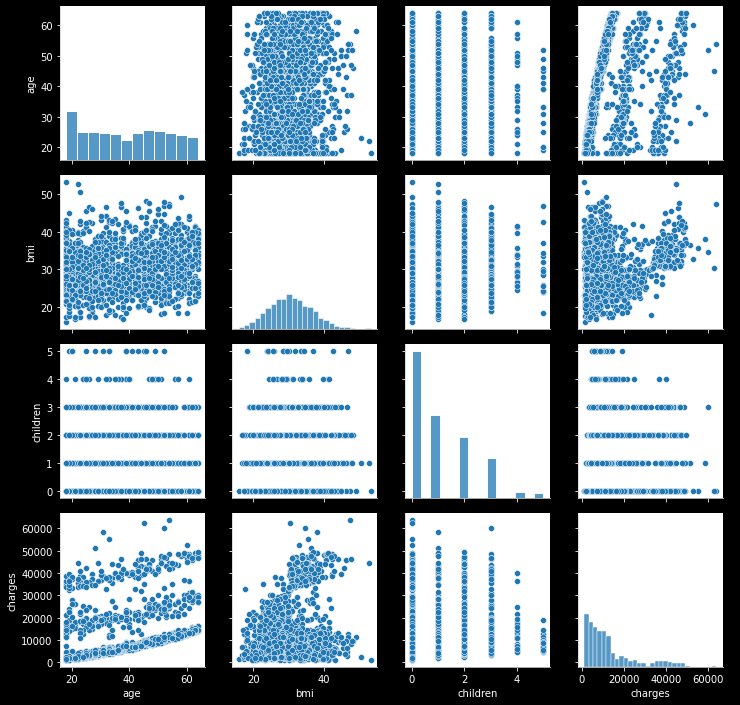

In [12]:
fig =sns.PairGrid(data)
fig.map_diag(sns.histplot)
fig.map_offdiag(sns.scatterplot)
fig.add_legend()

## Data Correlation:

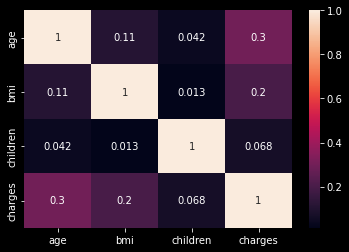

In [13]:
# only numerical columns
feature_data =data.drop(['charges'],axis=1)
sns.heatmap(data.corr(),annot=True)

### LabelEncoder:

In [14]:
data['sex']=[1 if each =='male' else 0 for each in data['sex']]
data['smoker']=[1 if each =='yes' else 0 for each in data['smoker']]


In [15]:
data_region_dict_encoder ={'southeast':1,'southwest':2,'northwest':3,'northeast':4}

for i in range(len(data.region)):
  data.region[i]=data_region_dict_encoder[data.region[i]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


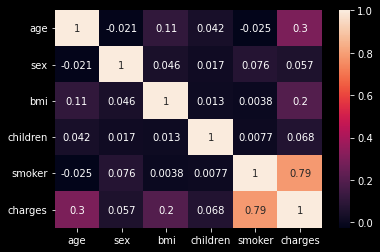

In [16]:
# all columns
feature_data =data.drop(['charges'],axis=1)
sns.heatmap(data.corr(),annot=True)

In [17]:
# try to encode childrem column according to priority

In [18]:
# 5:1 =>(5-5)+1
# 4:2 =>(5-4)+1
# 3:3 =>(5-3)+1
# 2:4 =>(5-2)+1
# 1:5 =>(5-1)+1

data['children'] =[(5-x)+1 for x in data.children]

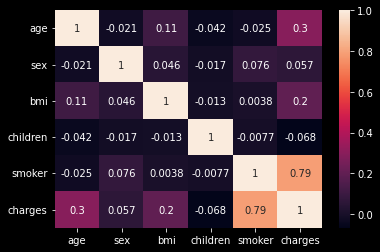

In [19]:
# all columns
feature_data =data.drop(['charges'],axis=1)
sns.heatmap(data.corr(),annot=True)

In [20]:
# no difference => return it to the original
data['children'] =[abs(x-6) for x in data.children]

**Observations:**


1.   high correlated features: [age,bmi,smoker]
 



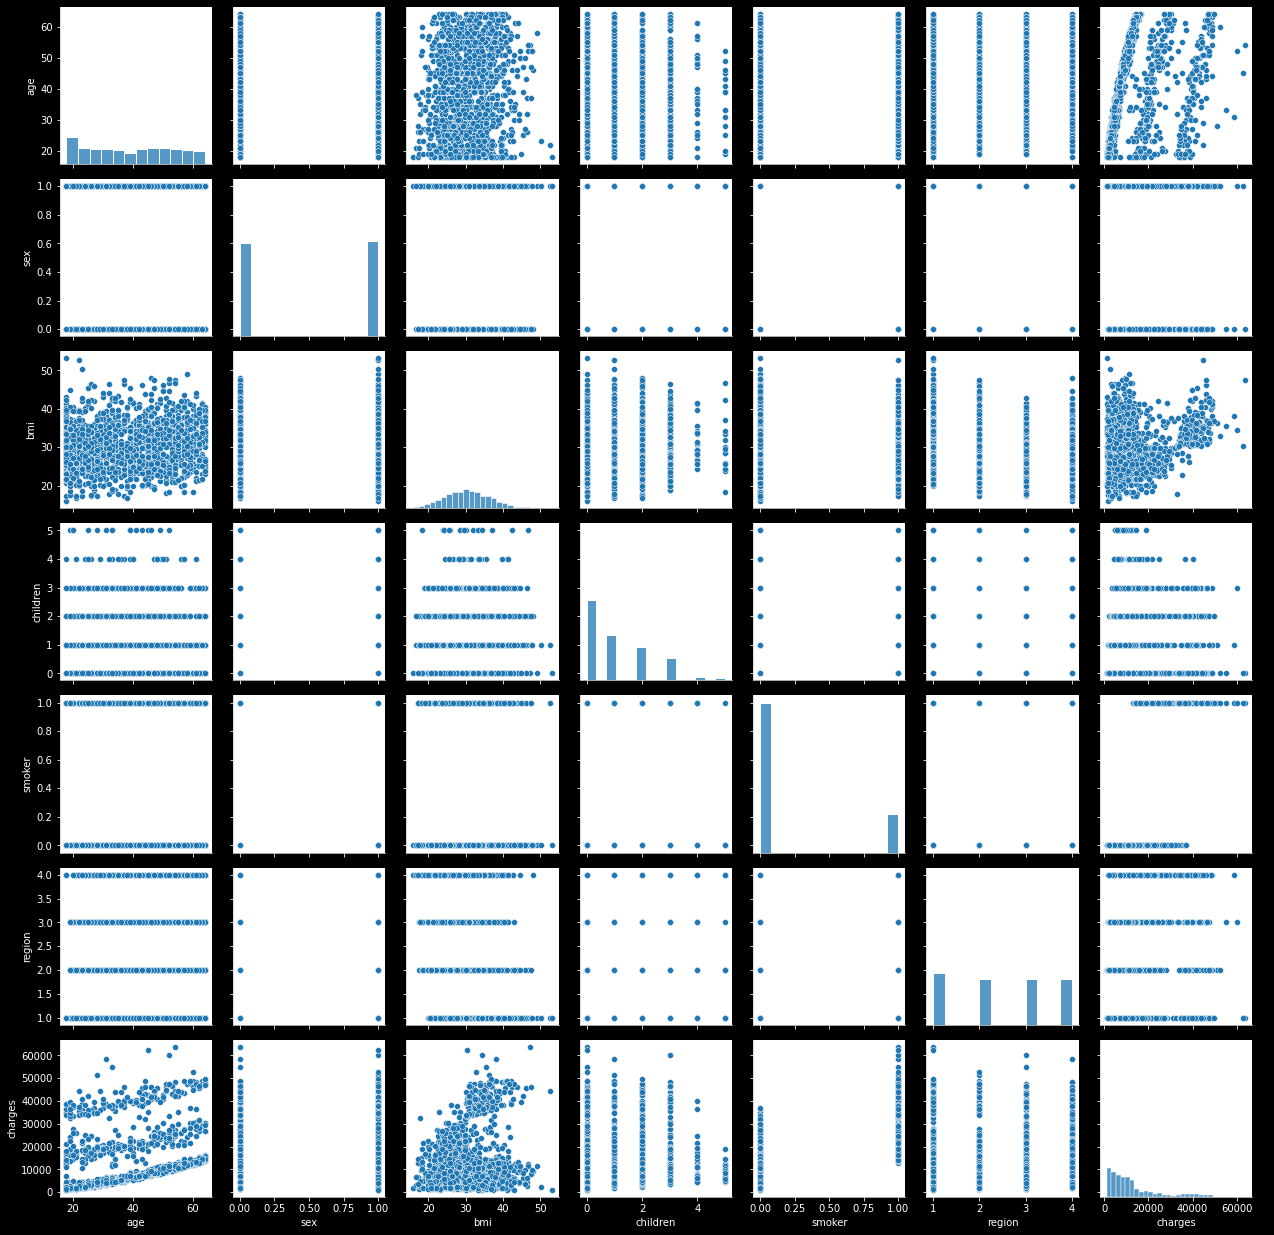

In [21]:
fig =sns.PairGrid(data)
fig.map_diag(sns.histplot)
fig.map_offdiag(sns.scatterplot)
fig.add_legend()

### Distplot for all columns:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

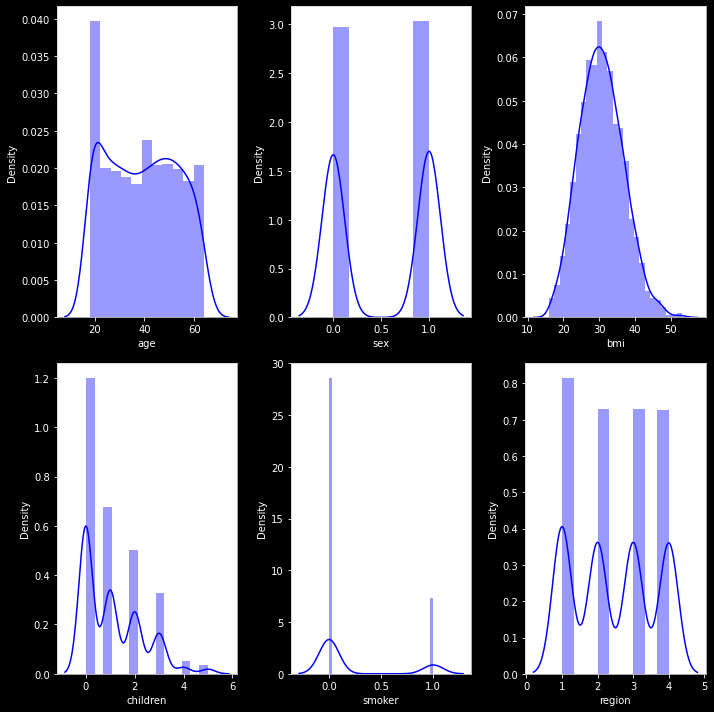

In [22]:
fig, ax=plt.subplots(ncols=3, nrows=2,figsize=(10,10))

ax=ax.flatten()

for i, col in enumerate(data.drop(['charges'],axis=1)):
  sns.distplot(data[col] ,ax=ax[i],color='blue')
  
plt.tight_layout()


## Features Selection :

In [23]:
# change region column type from object to int64
data['region'] =data['region'].astype('int64')

In [24]:
feature_dataFrame =data.drop(['charges'],axis=1)
target_dataFrame =data['charges']

In [25]:
feature_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 62.8 KB


### Wrapper Method: Backward Elimination:

In [26]:
# ask for explination for this method

In [27]:
import statsmodels.api as sm

# adding constant column of ones, mandatory for sm.OLS model
x_add_column_ones =sm.add_constant(feature_dataFrame)

# fitting sm.OLS model
model =sm.OLS(target_dataFrame,x_add_column_ones).fit()
model.pvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const       6.960683e-32
age         6.920274e-89
sex         6.934663e-01
bmi         1.388919e-31
children    6.015586e-04
smoker      0.000000e+00
region      1.521160e-02
dtype: float64

In [28]:
#Backward Elimination
features_cols =list(feature_dataFrame.columns)
pmax=1

while(len(features_cols)>0):
  p=[]
  x_1=feature_dataFrame[features_cols]
  x_1=sm.add_constant(x_1)

  model =sm.OLS(target_dataFrame,x_1).fit()

  p =pd.Series(model.pvalues.values[1:],index=features_cols)

  pmax=max(p)

  feature_with_p_max =p.idxmax()

  if(pmax>0.05):
    features_cols.remove(feature_with_p_max)
  else:
    break

selected_features_BE =features_cols
print(selected_features_BE)


['age', 'bmi', 'children', 'smoker', 'region']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**conclousion:**


1.  untill now the most important feature are: [age, bmi, smoker]
2. then children then region 



### remove outliers:

In [29]:
remove_outliers_columns=['sex','region']

In [30]:
removed_outliers_data = data[['sex','region','charges']].copy(deep=True)

In [31]:
# from scipy import stats

# for col in remove_outliers_columns:
#   removed_outliers_data[(np.abs(stats.zscore(removed_outliers_data[col]))<3).any(axis=1)]
 

# Machine Learning:

In [32]:
from sklearn.model_selection import train_test_split

## Spliting the data:

### Split the original data:

In [33]:
x_original =data.drop(['charges'],axis=1).values
y_original =data['charges'].values

In [34]:
x_train_original, x_test_original, y_train_original, y_test_original =train_test_split(x_original,y_original,test_size=0.3,random_state=1)

### Split the extracted features data:

In [35]:
x_extracted =data.drop(['charges','children','region'],axis=1).values
y_extracted =data['charges'].values

In [36]:
x_train_extracted, x_test_extracted, y_train_extracted, y_test_extracted =train_test_split(x_extracted,y_extracted,test_size=0.3,random_state=1)

## Applying Machine Learning Models:

### Linear Model:

In [37]:
from sklearn import linear_model

In [38]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 32.4 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [39]:
from mlxtend.evaluate import bias_variance_decomp

#### for original data

In [40]:
LR_model = linear_model.LinearRegression()
LR_model.fit(x_train_original,y_train_original)

y_pred = LR_model.predict(x_test_original)

In [41]:
LR_model_original_data =linear_model.LinearRegression()
LR_model_original_data.fit(x_train_original,y_train_original)

LinearRegression()

In [42]:
y_pred_original =LR_model_original_data.predict(x_test_original)

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

r_score =r2_score(y_test_original, y_pred_original)
MSE = mean_squared_error(y_test_original,y_pred_original)
RMSE =np.sqrt(MSE)

print('r2_score =', r_score)
print('mean_squared_error =', MSE)
print('root_mean_squared_error =',RMSE)

r2_score = 0.7404858549911035
mean_squared_error = 36777481.2059511
root_mean_squared_error = 6064.4440145780145


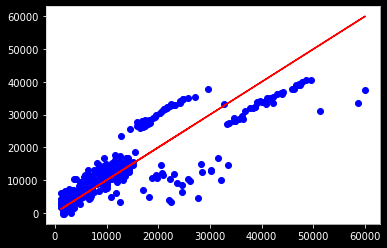

In [44]:
# i don't understand the plot
plt.plot(y_test_original, y_test_original, color='red')
plt.scatter(y_test_original,y_pred_original,color='blue' )

In [45]:
avg_expected_loss, avg_bais, avg_variance = bias_variance_decomp(LR_model_original_data, x_train_original, y_train_original, x_test_original,  y_test_original, loss = 'mse', num_rounds=200, random_seed=32)

 

print('Avarage loss =',avg_expected_loss)
print('Average Bais =', avg_bais)
print('Average Variance =', avg_variance)
                                                                
                                                                 

Avarage loss = 37151612.848655425
Average Bais = 36823145.99799246
Average Variance = 328466.8506629601


high bais, low variance =>  underfitting

 



Solution:


1.   use more complex model: such as polynomial 
2.   increase the input features: try using pca and add the concloded feature
3.   decrease the regularization term 



#### for extracted data

In [46]:
LR_model_extracted_data =linear_model.LinearRegression()
LR_model_extracted_data.fit(x_train_extracted,y_train_extracted)

LinearRegression()

In [47]:
y_pred_extracted =LR_model_extracted_data.predict(x_test_extracted)

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

r_score =r2_score(y_test_extracted, y_pred_extracted)
MSE = mean_squared_error(y_test_extracted,y_pred_extracted)
RMSE =np.sqrt(MSE)

print('r2_score =', r_score)
print('mean_squared_error =', MSE)
print('root_mean_squared_error =',RMSE)

r2_score = 0.7346651621337206
mean_squared_error = 37602370.431779906
root_mean_squared_error = 6132.07717105549


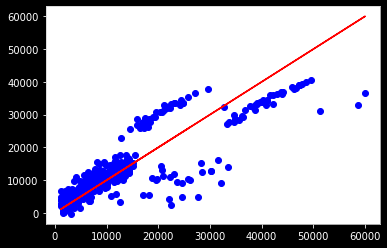

In [49]:
# i don't understand the plot
plt.plot(y_test_extracted, y_test_extracted, color='red')
plt.scatter(y_test_extracted,y_pred_extracted,color='blue' )

In [50]:
avg_expected_loss, avg_bais, avg_variance =bias_variance_decomp(LR_model_extracted_data,x_train_extracted,y_train_extracted, x_test_extracted, y_test_extracted,loss='mse',num_rounds=200,random_seed=32)

print('Avarage loss =',avg_expected_loss)
print('Average Bais =', avg_bais)
print('Average Variance =', avg_variance)
                                                                
                                                                 

Avarage loss = 37881502.446840055
Average Bais = 37633100.15363727
Average Variance = 248402.2932027914


### Polynomial Regression:

#### for original data:

In [51]:
from sklearn.preprocessing import PolynomialFeatures

ploy_reg =PolynomialFeatures(degree=2)

x_ploy =ploy_reg.fit_transform(x_original)

In [52]:
x_train_original_poly, x_test_original_poly, y_train_original_poly, y_test_original_poly =train_test_split(x_ploy ,y_original ,test_size=0.3, random_state=1)

In [53]:
poly_model_2 =linear_model.LinearRegression()

poly_model_2.fit(x_train_original_poly,y_train_original_poly)

y_poly_pred =poly_model_2.predict(x_test_original_poly)

In [54]:
r_score =r2_score(y_test_original_poly, y_poly_pred)
MSE = mean_squared_error(y_test_original_poly,y_poly_pred)
RMSE =np.sqrt(MSE)

print('r2_score =', r_score)
print('mean_squared_error =', MSE)
print('root_mean_squared_error =',RMSE)

r2_score = 0.8466485132434627
mean_squared_error = 21732462.490242556
root_mean_squared_error = 4661.8089289719455


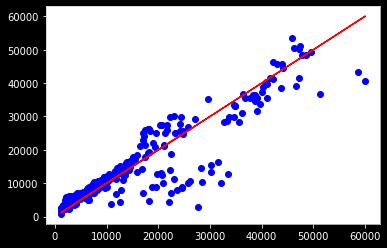

In [55]:
plt.plot(y_test_original_poly, y_test_original_poly, color='red')
plt.scatter(y_test_original_poly, y_poly_pred,color='blue' )

In [56]:
avg_expected_loss, avg_bais, avg_variance =bias_variance_decomp(poly_model_2,x_train_original_poly,y_train_original_poly, x_test_original_poly, y_test_original_poly,loss='mse',num_rounds=200,random_seed=32)

print('Avarage loss =',avg_expected_loss)
print('Average Bais =', avg_bais)
print('Average Variance =', avg_variance)
                                            

Avarage loss = 27006345.602431208
Average Bais = 21734881.708256934
Average Variance = 5271463.894174272


Original Results:

1. degree =1



>  * r2_score = 0.7346651621337206
   * mean_squared_error = 37602370.431779906
   * root_mean_squared_error = 6132.07717105549
   * Avarage loss = 37881502.446840055
   * Average Bais = 37633100.15363727
   * Average Variance = 248402.2932027914
  


>high bais, low variance =>  underfitting



2. degree =2


>   *   r2_score = 0.8466485132434627
    *   mean_squared_error = 21732462.490242556
    *   root_mean_squared_error = 4661.8089289719455
    *   Avarage loss = 27006345.602431208
    *   Average Bais = 21734881.708256934
    *   Average Variance = 5271463.894174272



> low bais, low variance => good fitting(best fitting of linear regression, but still not very good)



3. degree =3


> * r2_score = 0.8369680004213078
  * mean_squared_error = 23104352.559543267
  * root_mean_squared_error = 4806.698717367593 
  * Avarage loss = 33317435.605650045
  * Average Bais = 23246831.76383875
  * Average Variance = 10070603.841811292

> low bais, high variance => over fitting

4. degree =4

> * r2_score = 0.8087724964158217
  * mean_squared_error = 27100125.57846112
  * root_mean_squared_error = 5205.7780953918045
  * Avarage loss = 60984495.33998619
  * Average Bais = 26406670.29295838
  * Average Variance = 34577825.04702781

> low bais, high variance => over fitting

5. degree =5


> * r2_score = 0.3762577842957824
  * mean_squared_error = 88394671.56841783
  * root_mean_squared_error = 9401.84405148361
  * Avarage loss = 1600314657.9380047
  * Average Bais = 118438296.38915314
  * Average Variance = 1481876361.5488515

> high bais, high variance => bad fitting  

6. degree =6

> * r2_score = -83634.43851583547
  * mean_squared_error = 11852536084544.34
  * root_mean_squared_error = 3442751.2376795886
  * Avarage loss = 1543429680882.2344
  * Average Bais = 6664488925.7734165
  * Average Variance = 1536765191956.4612

> high bais, high variance => bad fitting  

7. degree =7

> * r2_score = -494474.5072745006
  * mean_squared_error = 70075423730631.95
  * root_mean_squared_error = 8371106.481859609
  * Avarage loss = 1550107517267475.8
  * Average Bais = 7101211954857.934
  * Average Variance = 1543006305312617.8

> high bais, high variance => bad fitting  



 







** The best degree is 2 with RMSE=4661.8089289719455

Question: 
 -> how bais and varaince increase together??

## Ridge Regression:

### for original data:

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model =Ridge()

In [58]:
parameters ={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,70,80,90,100]}

In [59]:
ridge_regressor  =GridSearchCV(ridge_model, param_grid=parameters, scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train_original,y_train_original)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 70, 80, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [60]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-37169882.981848136


In [61]:
# test the new model with test data
ridge_model_hyper =Ridge( alpha=0.01)

In [62]:
ridge_model_hyper.fit(x_train_original,y_train_original)

Ridge(alpha=0.01)

In [63]:
y_pred_original_ridge =ridge_model_hyper.predict(x_test_original)

In [64]:
from sklearn.metrics import r2_score, mean_squared_error

r_score =r2_score(y_test_original, y_pred_original_ridge)
MSE = mean_squared_error(y_test_original,y_pred_original_ridge)
RMSE =np.sqrt(MSE)

print('r2_score =', r_score)
print('mean_squared_error =', MSE)
print('root_mean_squared_error =',RMSE)

r2_score = 0.7404882593502968
mean_squared_error = 36777140.46816572
root_mean_squared_error = 6064.41592143594


## Lasso Regression:

### For original data:

In [65]:
from sklearn.linear_model import Lasso

lasso_model =Lasso()

In [73]:
parameters ={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,3,4,5,6,7,8,9,10,20,30,35,40,45,50,55,70,80,90,100]}

In [74]:
lasso_regressor =GridSearchCV(lasso_model, param_grid=parameters, scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train_original,y_train_original)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.311e+10, tolerance: 1.117e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+10, tolerance: 1.121e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 30, 35, 40, 45, 50,
                                   55, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [75]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-37169625.54015688


In [69]:
# test the new model with test data
lasso_model_hyper =Lasso( alpha=5)

In [70]:
lasso_model_hyper.fit(x_train_original,y_train_original)

Lasso(alpha=5)

In [71]:
y_pred_original_lasso =lasso_model_hyper.predict(x_test_original)

In [72]:
from sklearn.metrics import r2_score, mean_squared_error

r_score =r2_score(y_test_original, y_pred_original_lasso )
MSE = mean_squared_error(y_test_original,y_pred_original_lasso )
RMSE =np.sqrt(MSE)

print('r2_score =', r_score)
print('mean_squared_error =', MSE)
print('root_mean_squared_error =',RMSE)

r2_score = 0.7405218204153565
mean_squared_error = 36772384.30568587
root_mean_squared_error = 6064.023771860222
